**Time series Data of NVIDIA**

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_data = yf.download('NVDA', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000
2024-01-03,47.555515,48.170339,47.306585,47.471539,320896000
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000


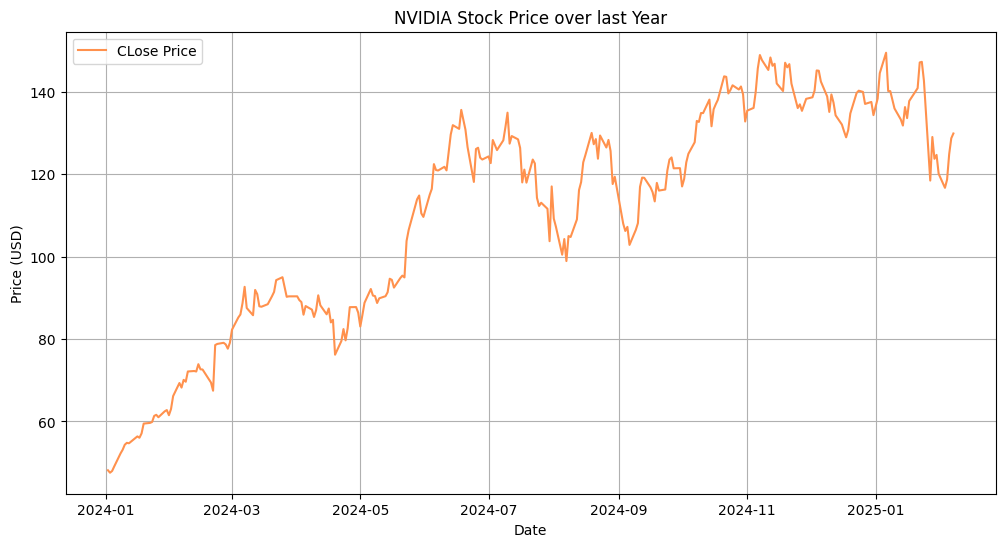

In [3]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='CLose Price', color='#FF914D')
plt.title('NVIDIA Stock Price over last Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Classical Time Series Decomposition**

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [5]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

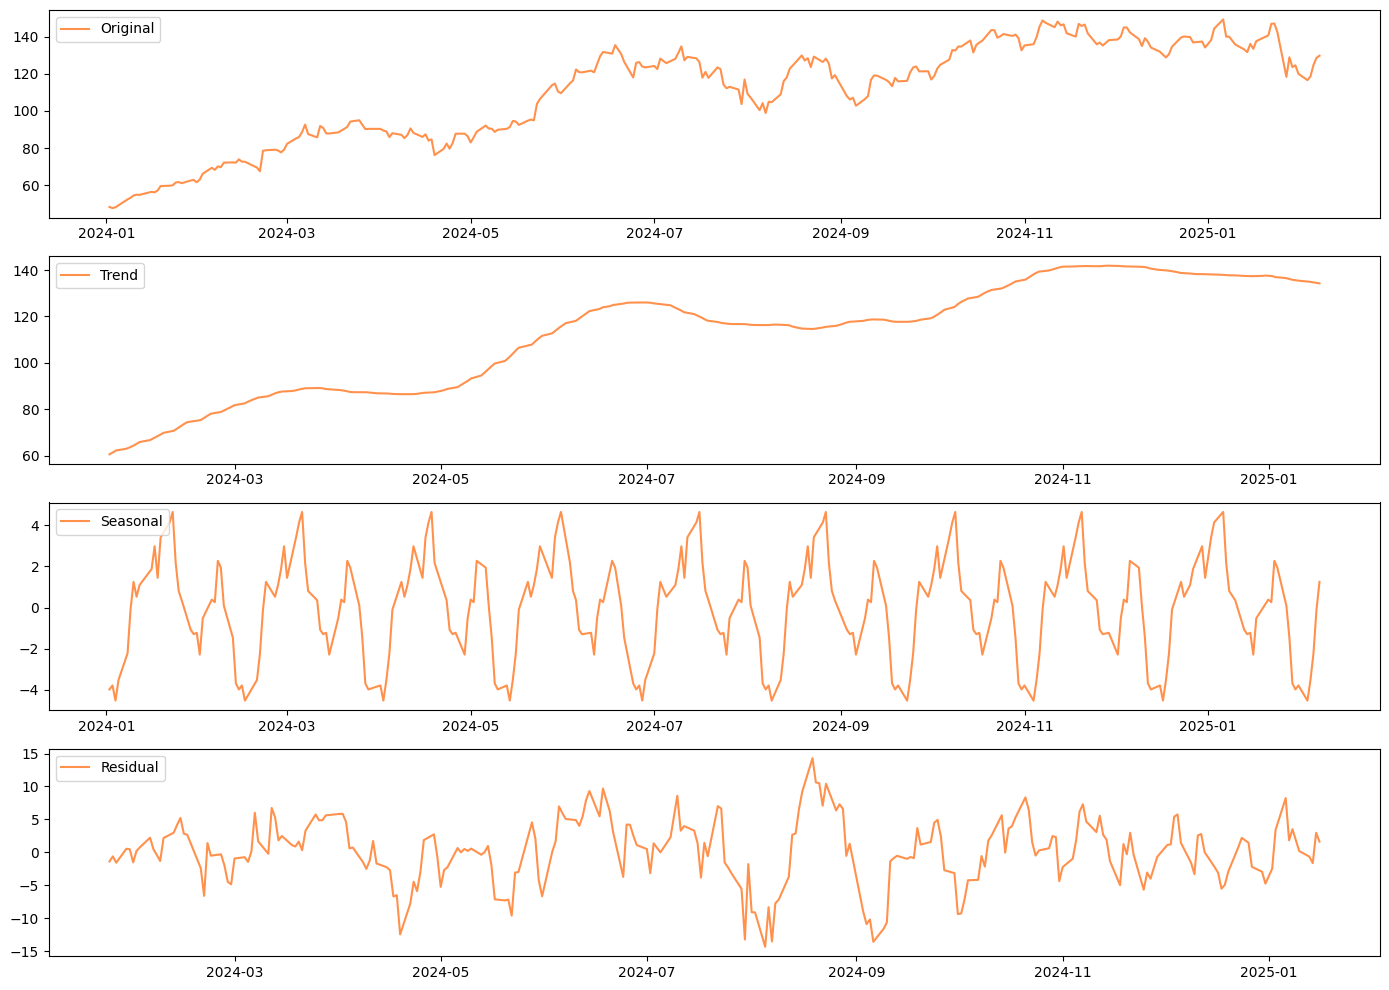

In [6]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**STL Decomposition**

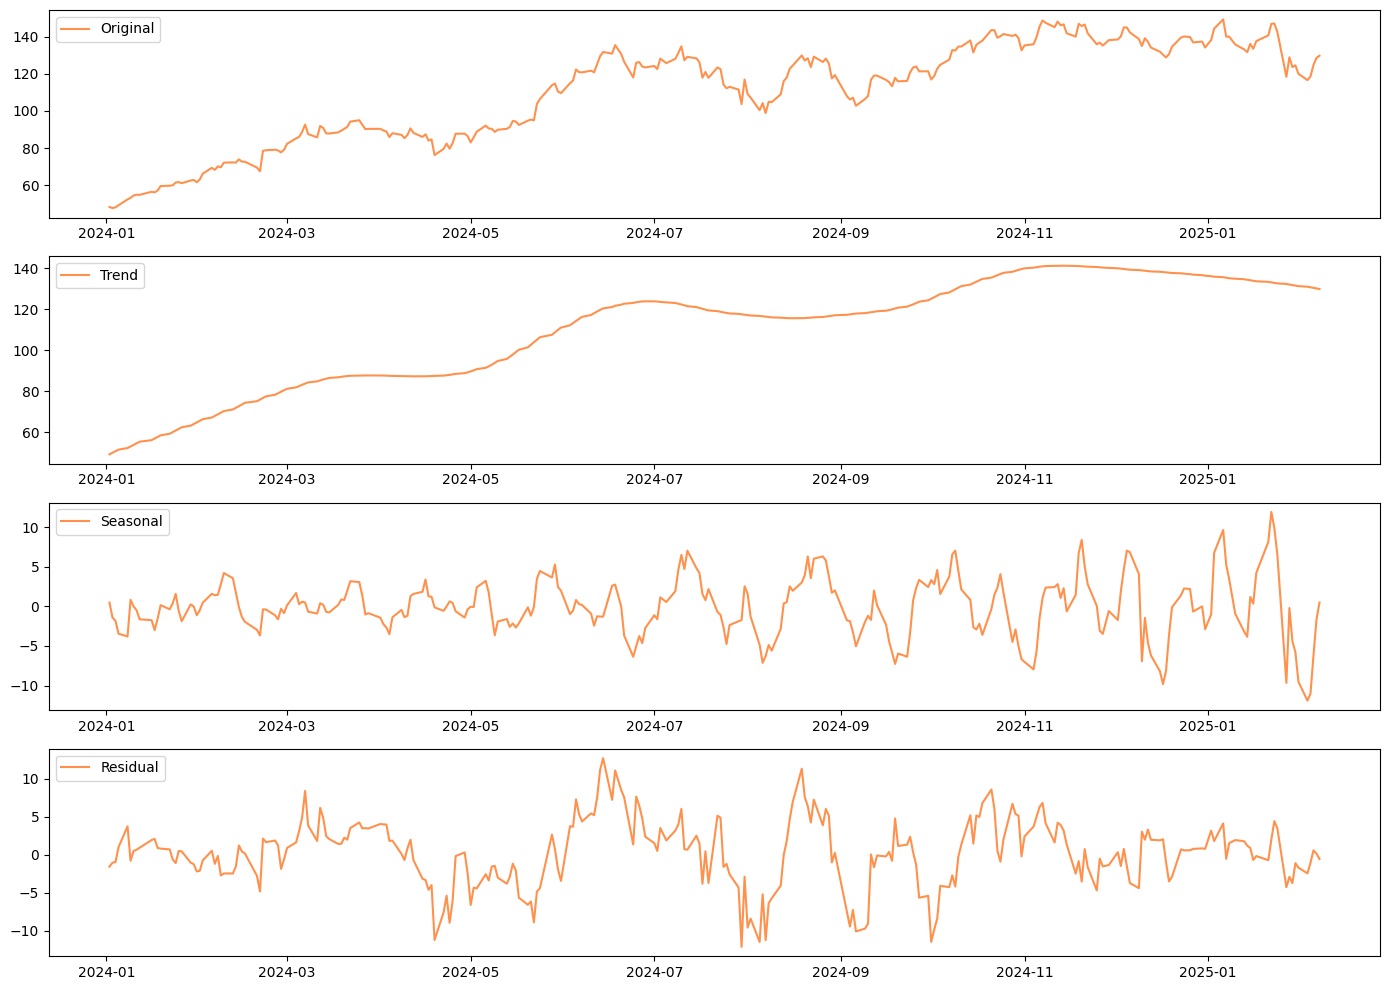

In [7]:
from statsmodels.tsa.seasonal import STL

# Perform STL Decomposition
stl_decomposition = STL(stock_data['Close'], period=30)
result = stl_decomposition.fit()

# Plot the decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()